# Parameterization of continuous distributions


In the previous sections, you have studied different parametric distributions that can be applied to model the univariate uncertainty in our data. Those distributions were characterized by a set of parameters (e.g.: $\lambda$ for Exponential distribution). Those parameters can be fitted to model real-world data as accurately as possible and, thus, use the distribution for predicting future events. Along the sections devoted to present a selection of distribution functions, the equations for the PDF and CDF as you can usually find them in text books were presented. However, they are just equations! That means that we can play with them and parameterize the distribution the way that fits best to our purposes.

In this section the parameterization loc-scale-shape will be addressed in the context of `scipy` Python package. This parameterization is very convenient due to the consistency it provides (all distributions with the same parameters), the ease of the interpretation of those parameters and the advantages of their implementation in computer code. That is why `scipy` package (between others) uses this parameterization for continuous distribution functions.

## Definition of location, scale and shape

The location ($\mu$) parameter shifts the distribution along the x-axis without changing its shape. The scale parameter ($\beta$) determines the width of the distribution. Finally, the shape parameter ($\xi$) is any extra parameter (if any) in the distribution function which is not $\mu$ or $\beta$ and describes the form of the distribution. Let's see it better with a couple of examples!

You have already been introduced to the (right-tailed) Gumbel distribution, whose PDF is given by

$$
f(x) = \frac{1}{\beta}e^{\normalsize -\left( \cfrac{x-\mu}{\beta} + e^{\normalsize -\left( \cfrac{x-\mu}{\beta} \right)}\right)}
$$

where $\mu$ is the location parameter and $\beta>0$ is the scale parameter. You can see that the conventional form of the Gumbel distribution is actually the loc-shape-scale parameterization! We will see more about it later, so let's focus now on the meaning of those parameters. In the figure below, you can see the PDF of three Gumbel distributions. The blue and the black ones have the same scale parameter but different location. Thus, the distribution moves along x-axis. Note that the location parameter defined the mode of the distribution. The black and red distributions present the same location parameter but different scale. Thus, the mode is located at $x=0$ in both distributions (since $\mu$=0) but the red distribution (with a higher scale) spreads along a wider range of values. 

```{figure} ./figures/gumbel_PDF.png

PDF of Gumbel distribution function.
```

Since the Gumbel distribution does not present a shape parameter, let's see it with a different distribution. The generalized form of Gumbel distribution is the Generalized Extreme Value (GEV) distribution. Similarly to Gumbel distribution (and as you can guess from its name), it is applied to model the probabilistic behavior of extreme observations (you will learn more about this later in the course). The PDF of the GEV is given as

$$
g(x) = exp{-\left[1+\xi \cfrac{x-\mu}{\sigma}\right]^{\cfrac {-1}{\xi}}}  \hspace{1cm} \left(1+\xi \cfrac{x-\mu}{\sigma}\right)>0
$$

where $-\infty < \mu < \infty$ is the location parameter, $\sigma > 0$ is the scale parameter, and $-\infty < \xi < \infty$ is the shape parameter. Let's see the effect of the shape parameter!

In the figure below, you can see the PDF (left pannel) and the CDF (right pannel) of three GEV distributions. They have the same location ($\mu$=0) and scale ($\sigma$=1) but different shape parameters ($\xi$ = -1, 0 and 1). You can see that the form of the three distributions is totally different! Don't worry too much about this specific case, you just need to remember that the shape parameter controls the form of the distribution.

```{figure} ./figures/gev_shape.png

Effect of shape parameter on GEV distribution: (left) PDF, and (right) CDF.
```

## Standardized form

In order to address the loc-scale-shape parameterization, first the standardized form of a distribution needs to be defined. The standardized form is that where there are no extra parameters but shape parameters (if any); the density function is written purely as a function of the random variable $x$, without any scaling or shifting.

For the right-tailed Gumbel distribution, the standardized form of the PDF would be given by

$$
f(x) = e^{\normalsize- (x + e^{\normalsize -x})}
$$

The standardized Gumbel distribution can be useful when describing a certain dataset, however, it could be quite limiting. Think of the fact that not all random variables have these characteristics of mean and variance. Thus, we can shift and scale the standard distribution to give it the characteristics that we want.

## From convention to loc-scale-shape parameterization with an example

As mentioned, we need to be able to go from the parameters of the conventional form of the distribution to loc-shape-scale in order to use computer packages. Here, we will focus on `scipy` and will address the example of the Lognormal distribution since it is the one which creates the most confussion. You can find the documentation about the Lognormal distribution in `scipy` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html).

If you follow the link, you will find the following description of the implemented Lognormal distribution:

```{figure} ./figures/scipy.png

Documentation on the Lognormal distribution in `scipy`.
```



First, the PDF in standardized form is presented with a shape parameter $s$. Let's compare this PDF with the conventional one, which is given by

$$
f(x) = \frac{1}{x \sigma \sqrt{2 \pi}}e^{\left(\normalsize -\cfrac{(\ln(x)-\mu)^2}{2\sigma^2}\right)}
$$

where $\mu$ and $\sigma$ are the mean and standard deviation of the variable's natural logarithm. If we compare both parameterizations, it is clear that the shape parameter $s$ corresponds with $\sigma$. That was an easy one!

Let's focus now on the loc and scale parameters. If we go back to the documentation in the figure, it states '... lognorm.pdf(x, s, loc, scale) is identically equivalent to lognorm.pdf(y, s) / scale with y = (x - loc) / scale.' Let's apply it and see if we can find it out.

If we apply 'lognorm.pdf(y, s) / scale with y = (x - loc) / scale', we obtain:

$$
f(y) = \cfrac{\cfrac{1}{y \sigma \sqrt{2 \pi}}e^{\left( \normalsize-\cfrac{\left(\ln \left(y\right)\right)^2}{2\sigma^2}\right)}}{scale} = \cfrac{\cfrac{1}{\cfrac{\left(x - loc\right)}{\cancel{scale}} \sigma \sqrt{2 \pi}}e^{\left( \normalsize -\cfrac{\left(\ln\left(\cfrac{x-loc}{scale}\right)\right)^2}{2\sigma^2}\right)}}{\cancel{scale}} = \cfrac{1}{\left(x - loc\right) \sigma \sqrt{2 \pi}}e^{\left( \normalsize -\cfrac{\left(\ln\left(\frac{x-loc}{scale}\right)\right)^2}{2\sigma^2}\right)}
$$

If we compare this result with the standardized form of the Lognormal, the parameter loc does not seem to be there. Let's make loc = 0 and equate it to the standarized form.

$$
\cancel{\cfrac{1}{x\sigma \sqrt{2 \pi}}}e^{\left( \normalsize-\cfrac{\left(\ln\left(\cfrac{x}{scale}\right)\right)^2}{2\sigma^2}\right)} = \cancel{\frac{1}{x \sigma \sqrt{2 \pi}}}e^{\left( \normalsize-\cfrac{\left(\ln(x)-\mu\right)^2}{2\sigma^2}\right)}
$$

which leads to

$$
\ln\left(\cfrac{x}{scale}\right) = ln(x)-\mu
$$

and thus, $\ln\left(scale\right) = \mu$. Therefore, in `scipy`, we would need to set loc = 0, $scale = e^{\normalsize \mu}$ and $s = \sigma$ to use the Lognormal distribution.


## Let's check it using code

Here, we will define the PDF of the Lognormal distribution using a self-made  function and we will compare the results with `scipy` to check whether we reached to the appropriate solution.

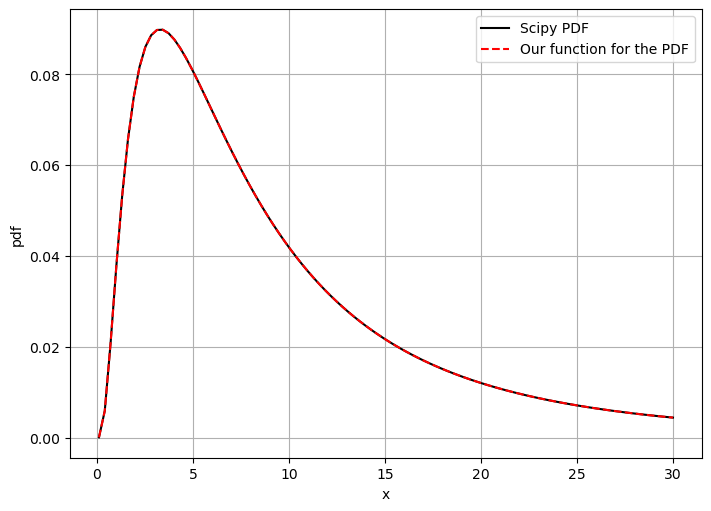

In [1]:
#Import the packages
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

#Create a function for the PDF of the Lognormal distribution
def lognormal_PDF(x, mu, sigma):
    density = 1/(x * sigma * (2*np.pi)**0.5)*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return density

#Define parameters
mu = 2
sigma = 0.9

# #Transform to loc, scale, shape
loc = 0
shape = sigma
scale = np.exp(mu)

#Define a vector and evaluate the PDF using both the self-made function and scipy
x = np.linspace(0.1, 30, 100)
density_scipy = lognorm.pdf(x, shape, loc, scale)
density_manual = lognormal_PDF(x, mu, sigma)

#Compare by plotting
fig, ax = plt.subplots(1,1, figsize=(7,5), layout='constrained')
ax.plot(x, density_scipy, 'k', label = 'Scipy PDF')
ax.plot(x, density_manual, '--r', label = 'Our function for the PDF')
ax.grid()
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('pdf');